**Problem Statement**

Make a ML model to predict the Big_Mart_Sales

In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
#loading the dataset
dataset = pd.read_csv('/content/big_mart_data.csv')

In [3]:
#printing the first five rows
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#getting the rows and columns of the dataset
dataset.shape

(8523, 12)

In [5]:
#getting some info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#checking the null values
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:

# mean value of "Item_Weight" column
dataset['Item_Weight'].mean()

12.857645184135976

In [8]:
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace=True)


In [9]:
#checking the null values again
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
dataset['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [12]:
mode_of_Outlet_size = dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [13]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [14]:
miss_values = dataset['Outlet_Size'].isnull()

In [15]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [16]:
dataset.loc[miss_values, 'Outlet_Size'] = dataset.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [17]:
#checking the null values again
dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
#getting some statistical measures of the dataset
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 600x600 with 0 Axes>

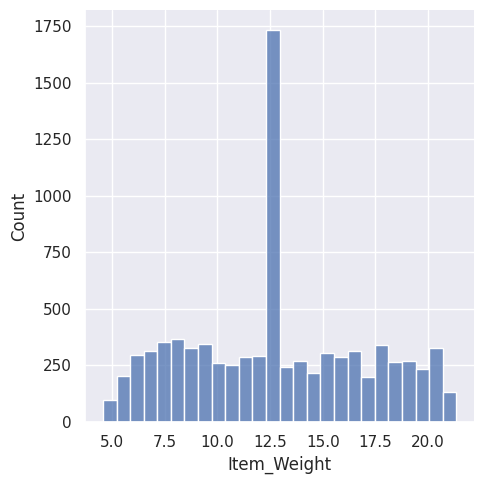

In [20]:
#Numerical Features
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dataset['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

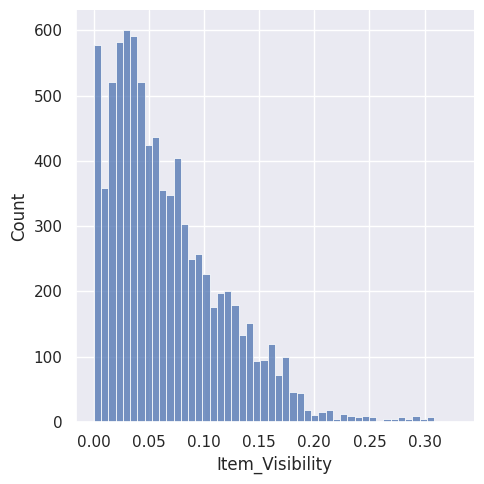

In [21]:
#Numerical Features
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dataset['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

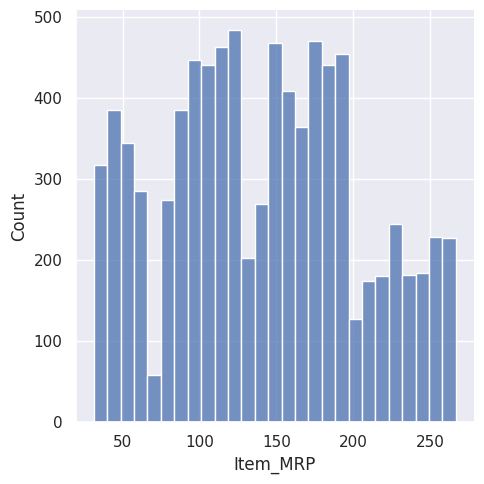

In [22]:
#Numerical Features
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dataset['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

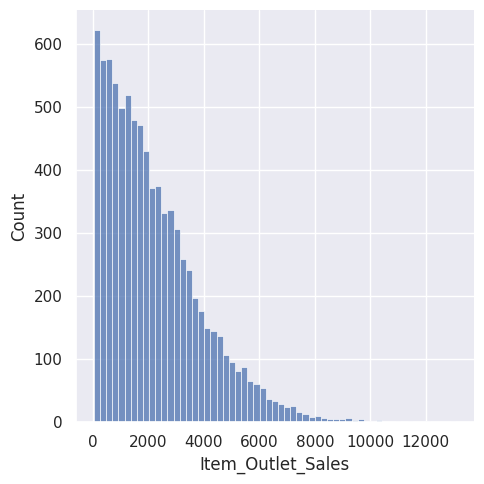

In [23]:
#Numerical Features
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dataset['Item_Outlet_Sales'])
plt.show()

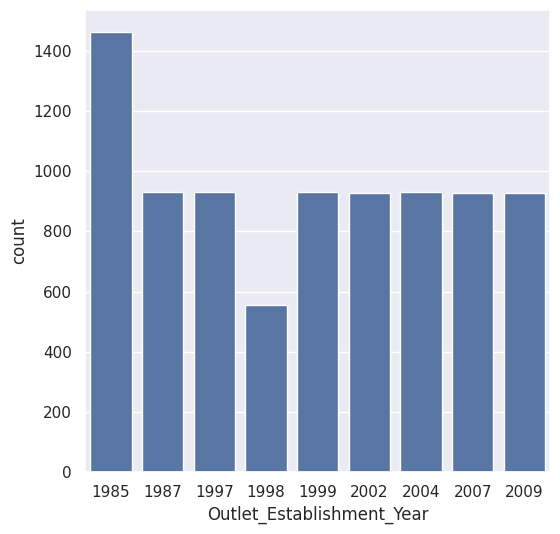

In [24]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x ='Outlet_Establishment_Year',data=dataset)
plt.show()

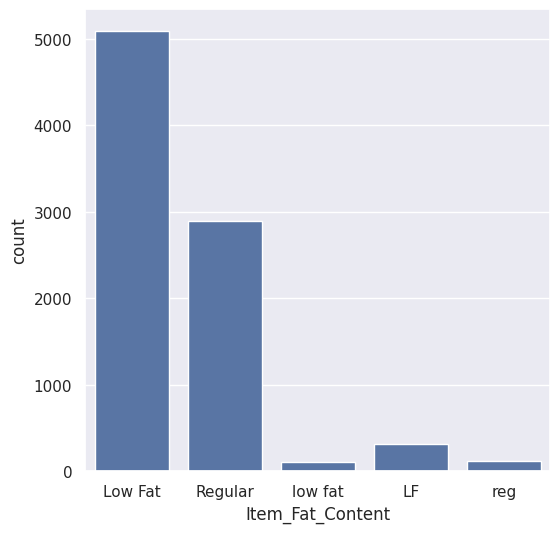

In [25]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x ='Item_Fat_Content',data=dataset)
plt.show()

In [26]:
dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [27]:
dataset.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [28]:
dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

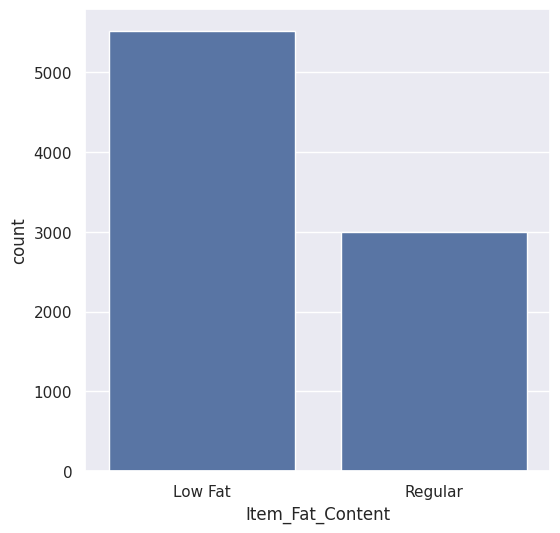

In [29]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x ='Item_Fat_Content',data=dataset)
plt.show()

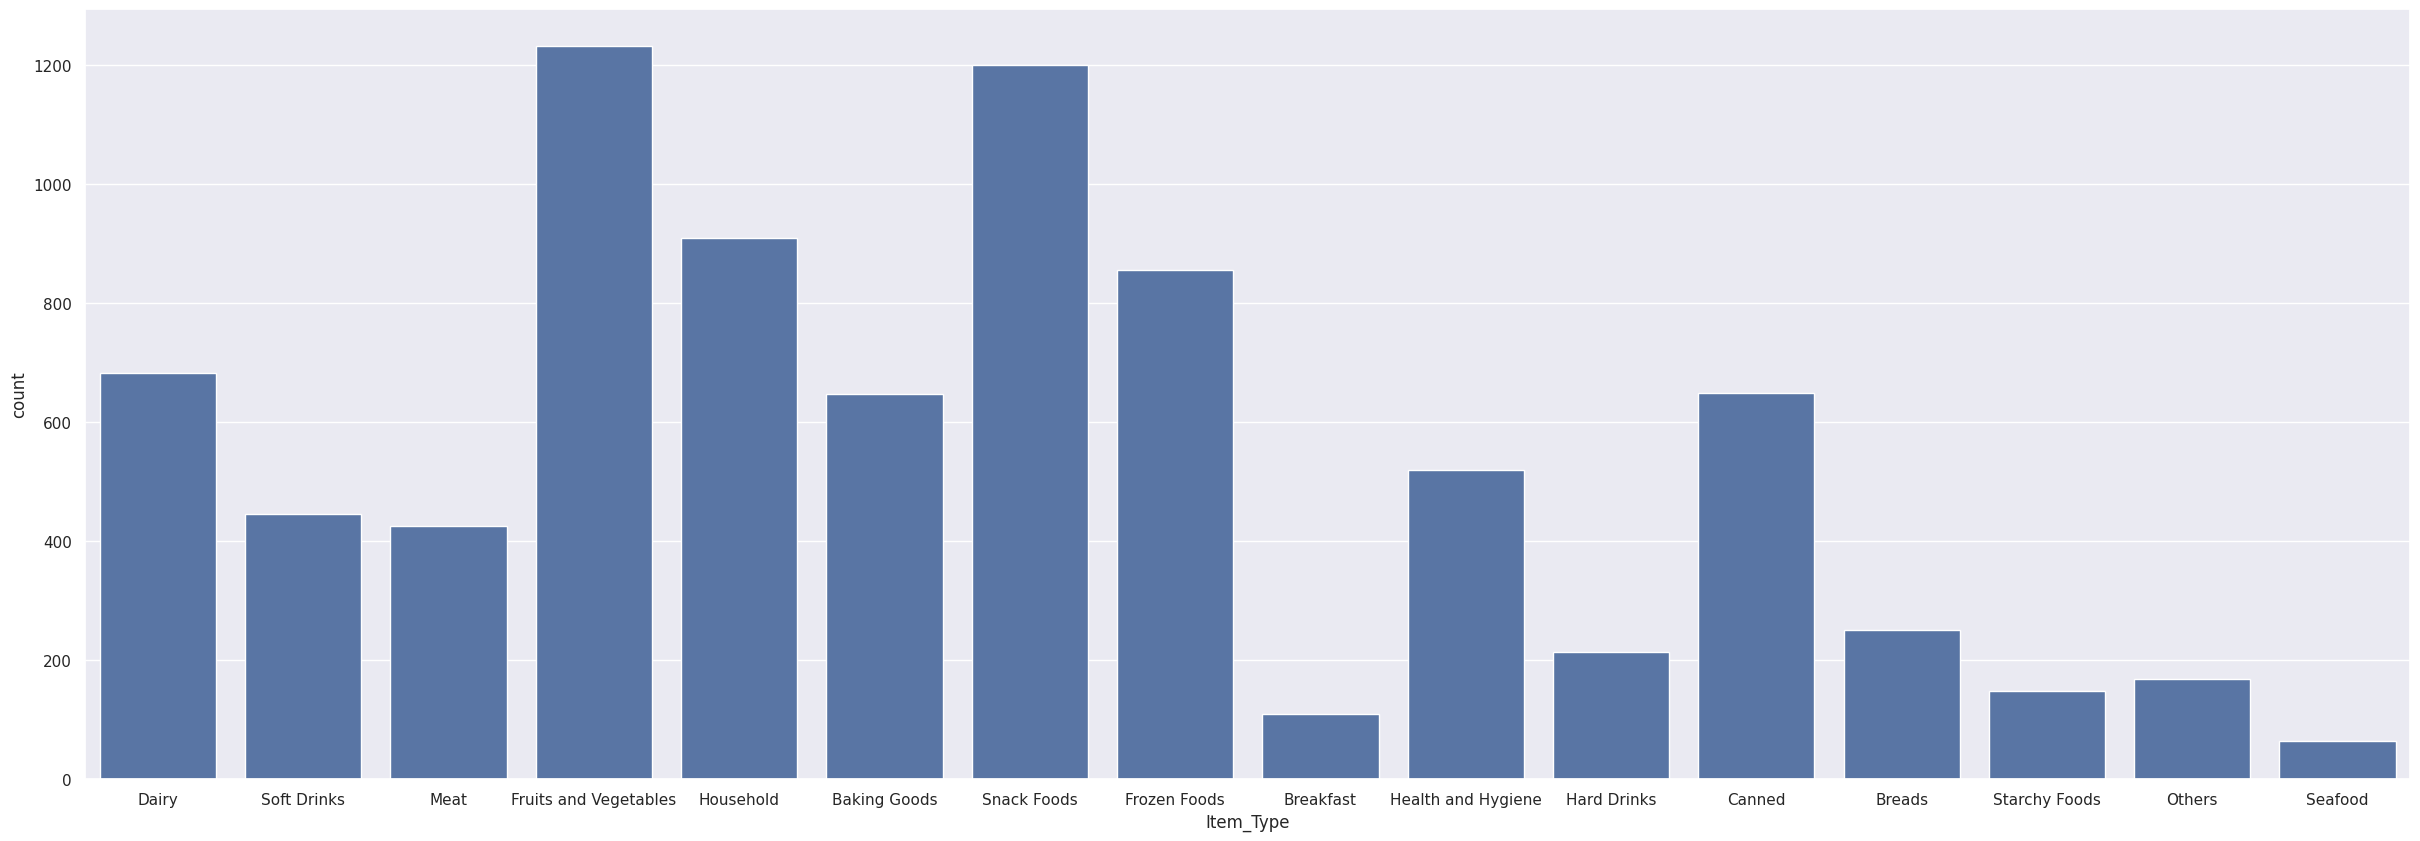

In [30]:
sns.set()
plt.figure(figsize=(30,10))
sns.countplot(x ='Item_Type',data=dataset)
plt.show()

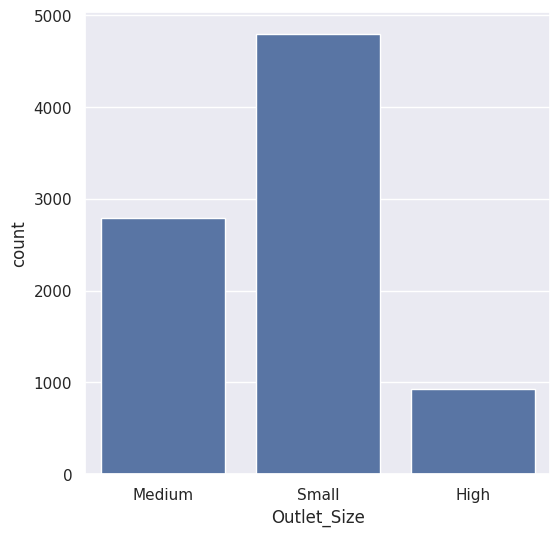

In [31]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x ='Outlet_Size',data=dataset)
plt.show()

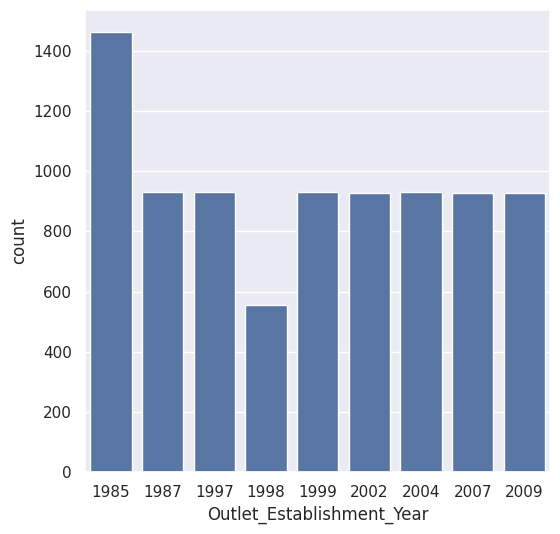

In [32]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x ='Outlet_Establishment_Year',data=dataset)
plt.show()

In [33]:
#implementing Label Encoding
encoder = LabelEncoder()
dataset['Item_Fat_Content'] = encoder.fit_transform(dataset['Item_Fat_Content'])
dataset['Item_Type'] = encoder.fit_transform(dataset['Item_Type'])
dataset['Item_Identifier'] = encoder.fit_transform(dataset['Item_Identifier'])
dataset['Outlet_Identifier'] = encoder.fit_transform(dataset['Outlet_Identifier'])
dataset['Outlet_Size'] = encoder.fit_transform(dataset['Outlet_Size'])
dataset['Outlet_Location_Type'] = encoder.fit_transform(dataset['Outlet_Location_Type'])
dataset['Outlet_Type'] = encoder.fit_transform(dataset['Outlet_Type'])

In [34]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [35]:
X = dataset.drop(columns='Item_Outlet_Sales',axis=1)
Y = dataset['Item_Outlet_Sales']

In [36]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [37]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [38]:
#splitting the data into train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [40]:
#training the model
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
#getting prediction for training data
training_prediction = model.predict(X_train)
print(training_prediction)

[2241.8008 2784.4749 3348.1802 ... 2619.9922 1810.6472 2076.5325]


In [42]:
#R squared Value
r2_train = metrics.r2_score(Y_train,training_prediction)
print("R squared value for training data : ",r2_train)

R squared value for training data :  0.8762174618111388


In [43]:
#getting prediction for testing data
testing_prediction = model.predict(X_test)
print(testing_prediction)

[2350.1606 1861.6439 1700.9556 ... 2857.3364 2405.3838 3876.3467]


In [44]:
#R squared Value
r2_test = metrics.r2_score(Y_test,testing_prediction)
print("R squared value for testing data : ",r2_test)

R squared value for testing data :  0.5017253991620692
